## Importingnecessary libraries

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## READING DATASET

In [179]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')  
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Let's do some non-graphical analysis first to understand the dataset

In [134]:
df.shape

(1338, 7)

In [135]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Some Observations Based On Obove Description


### lets check the count values for each column

In [137]:
print(df['age'].value_counts())


18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


In [138]:
print(df['sex'].value_counts())

male      676
female    662
Name: sex, dtype: int64


## Data is balanced in this case

In [139]:
print(df['bmi'].value_counts())

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


In [140]:
print(df['children'].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [141]:
print(df['smoker'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [142]:
print(df['region'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [143]:
print(df['charges'].value_counts())

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64


## As the target variable has continous data so it is a regression problem

In [144]:
df.isna().sum()  #finding the count if missing values from different columns

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### NO null values 

### Lets visualise the relationship between target variable and features having continous data

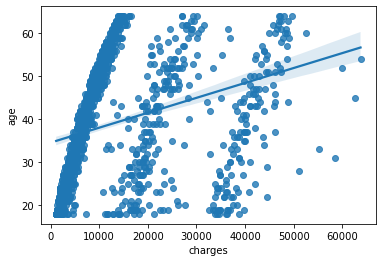

In [145]:
sns.regplot(x = 'charges', y = 'age', data = df)  #reg-regression-pointer always go  upward

plt.show()

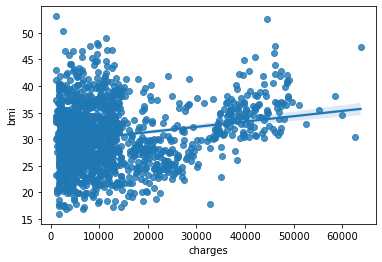

In [146]:
sns.regplot(x = 'charges', y = 'bmi', data = df)  

plt.show()

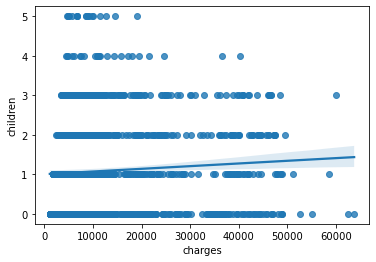

In [147]:
sns.regplot(x = 'charges', y = 'children', data = df)  

plt.show()

In [148]:
# Checking for  skeweness

df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

### As from the above observation here also we can see that the skeweness is present in the "charges" column but we dont remove the skeweness from target variable so we keepit as it is.

## Checking outliers using boxplot

### As we dont check outliers for taget variable as well as categorical data so we drop them first

In [149]:
df_features = df.drop('charges', axis = 1)
df1 = df_features.drop('sex', axis = 1)
df2 = df1.drop('smoker', axis = 1)
df3 = df2.drop('region', axis =1)

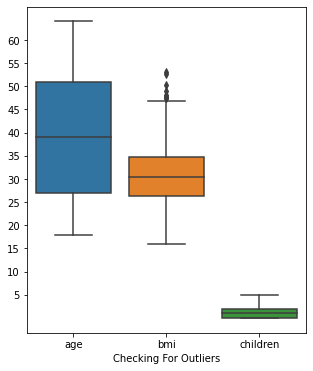

In [150]:
# boxplot

plt.figure(figsize=(5,6))     #5 is x axis measurement and 6 is of y

ax = sns.boxplot(data=df3)   

plt.yticks(range(5,61,5))     #range on y axis.. ticks - distance between two numbers 

plt.xlabel('Checking For Outliers')

plt.show()

### We can see that the outliers are present in 'bmi' column

### Removing outliers from 'bmi' column

In [180]:
df[df['bmi']<45].shape

(1318, 7)

In [152]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Plotting Heatmap(Correlation matrix)
### Let's plot heatmap to visualize and find the coefficient of multicolinearity

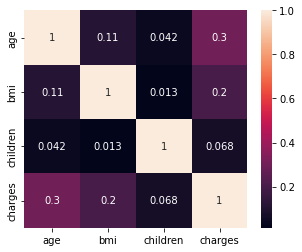

In [153]:
df_corr = df.corr().abs() #this code will get thecoefficient of one variable vs all other variables, abs is absolute no

plt.figure(figsize = (5, 4))

sns.heatmap(df_corr, annot = True, annot_kws = {'size' : 10})

plt.show()

## From above heatmap we can see that there is no multicollinearity

### Before building a model we have to encode the datapoints having 'object' datatypes

In [154]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [181]:
df2 = lab_enc.fit_transform(df['sex'])

pd.Series(df2)

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Length: 1338, dtype: int32

In [182]:
df['sex'] = df2

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [183]:
df2 = lab_enc.fit_transform(df['smoker'])

pd.Series(df2)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Length: 1338, dtype: int32

In [184]:
df['smoker'] = df2

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [185]:
from sklearn.preprocessing import OrdinalEncoder

In [186]:
ord_enc = OrdinalEncoder(categories = [['southeast', 'southwest', 'northeast', 'northwest']])

Encoded_df = ord_enc.fit_transform(df[['region']])

Encoded_df

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [3.]])

In [187]:
df['region'] = Encoded_df

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1.0,16884.92400
1,18,1,33.770,1,0,0.0,1725.55230
2,28,1,33.000,3,0,0.0,4449.46200
3,33,1,22.705,0,0,3.0,21984.47061
4,32,1,28.880,0,0,3.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3.0,10600.54830
1334,18,0,31.920,0,0,2.0,2205.98080
1335,18,0,36.850,0,0,0.0,1629.83350
1336,21,0,25.800,0,0,1.0,2007.94500


### After Encoding we check the correlation using heatmap

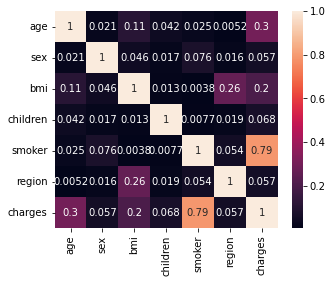

In [162]:
df_corr = df.corr().abs() #this code will get thecoefficient of one variable vs all other variables, abs is absolute no

plt.figure(figsize = (5, 4))

sns.heatmap(df_corr, annot = True, annot_kws = {'size' : 10})

plt.show()

### We can clearly see that there are no highly correlated features in our dataset

## Now our data is ready to build a model

## ModelBuilding

In [117]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge




## Linear Regression

In [188]:
# Devide data into features and labels

y = df['charges']

x = df.drop(columns = ['charges'] )

In [189]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=384)

In [120]:
from sklearn.linear_model import LinearRegression


regression = LinearRegression()

regression.fit(x_train, y_train) 

LinearRegression()

In [170]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [121]:
from sklearn.metrics import mean_absolute_percentage_error as mape
    
y_pred = regression.predict(x_train)
print('Training Error : ', mape(y_train, y_pred))
  
y_pred = regression.predict(x_test)
print('Validation Error : ', mape(y_test, y_pred))
print()

Training Error :  0.4327846439045245
Validation Error :  0.4173682173830759



### Predict the charges from given features

In [122]:
df.tail(2)

,age,sex,bmi,children,smoker,region,charges
1336,21,0,25.80,0,0,1.0,2007.9450
1337,61,0,29.07,0,1,3.0,29141.3603


In [123]:
print('Insurance cost : ',regression.predict(scaler.transform([[61, 0, 29.07, 0, 1, 3.0]])))

Insurance cost :  [31919.76694405]


### Let's check how well model fits the train data/ how could model learned

In [124]:
# Adjusted R2 score

regression.score(x_train,y_train)

0.744603665988898

### Let's plot and visualize

In [125]:
y_pred = regression.predict(x_test)

y_pred

array([26282.4242299 ,  6236.3775594 ,  2068.64626691, 24981.86556158,
       16319.19603813, 28959.57473279,  6623.30673994, 10935.42191005,
       12545.84519179, 12741.6954978 , 35199.87776461, 14151.37334446,
        8931.46290201,  6755.43985698, 11775.1567697 , 14180.71314971,
       14600.36653178,  7175.01836506,  7569.54258931,  8235.83518165,
       13869.8978468 , 15493.2920517 , 11519.23489388, 13444.74760538,
       17117.11589167, 37397.30448935,  8200.7618676 , 32374.78380468,
        4871.02377989, -1578.99715782,  7112.11911182, 15217.04270578,
       15473.0088402 , 33062.81813751, 36500.36252412, 28433.05229088,
       14140.35887234,  3598.05019312, 10065.09332288, 33171.75656418,
        7358.24504653, 11308.05340456,  1784.70345766,  4369.01176251,
        6695.73635728,  6024.7413498 ,  9341.21341953,  3027.99104043,
       15788.16846672, 10854.80814783,  8467.17101381, 38112.18097902,
        9351.79165818, 15748.02060062, 12364.30987818, 10270.92040224,
      

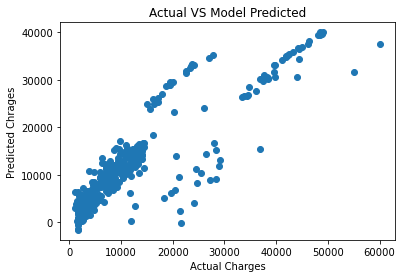

In [126]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Chrages')
plt.title('Actual VS Model Predicted')
plt.show()

In [ ]:
## 

## Random Forest Regressor

In [174]:
x_train,x_test,y_transformed,y_test = train_test_split(x,y,test_size = 0.25, random_state = 41)

In [190]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=6, n_informative=2, random_state=0, shuffle=False)
rfr = RandomForestRegressor(max_depth=6)
rfr.fit(X, y)

RandomForestRegressor(max_depth=6)

In [191]:
df.tail(2)

,age,sex,bmi,children,smoker,region,charges
1336,21,0,25.80,0,0,1.0,2007.9450
1337,61,0,29.07,0,1,3.0,29141.3603


In [192]:
print(rfr.predict([[61, 0, 29.07, 0, 1, 3.0]]))


[118.02301873]


In [193]:
RM = RandomForestRegressor()


RM.fit(x_train, y_train) 
y_pred = RM.predict(x_train)
print('Training Error : ', mape(y_train, y_pred))
  
y_pred = RM.predict(x_test)
print('Validation Error : ', mape(y_test, y_pred))
print()

Training Error :  0.12109225311343152
Validation Error :  0.37837738628899265



### Predict the charges from given features

In [194]:
print('Insurance cost : ',RM.predict(scaler.transform([[61, 0, 29.07, 0, 1, 3.0]])))

Insurance cost :  [15674.9577205]


### Let's check how well model fits the train data/ how could model learned

In [195]:
# Adjusted R2 score

RM.score(x_train,y_train)

0.976421756339397

## Lasso

In [196]:
from sklearn.linear_model import Lasso, Ridge

In [198]:
l = Lasso()
l.fit(x_train, y_train) 


Lasso()

In [199]:
l.fit(x_train, y_train) 
y_pred = l.predict(x_train)
print('Training Error : ', mape(y_train, y_pred))
  
y_pred = l.predict(x_test)
print('Validation Error : ', mape(y_test, y_pred))
print()

Training Error :  0.4328702963579994
Validation Error :  0.4174721090165365



### Predict the charges from given features

In [200]:
print('Insurance cost : ',l.predict(scaler.transform([[61, 0, 29.07, 0, 1, 3.0]])))

Insurance cost :  [32174.64289826]


### Let's check how well model fits the train data/ how could model learned

In [201]:
# Adjusted R2 score

l.score(x_train,y_train)

0.7446035802279489

## Ridge

In [202]:
r = Ridge()
r.fit(x_train, y_train) 

Ridge()

In [203]:
r.fit(x_train, y_train) 
y_pred = r.predict(x_train)
print('Training Error : ', mape(y_train, y_pred))
  
y_pred = r.predict(x_test)
print('Validation Error : ', mape(y_test, y_pred))
print()

Training Error :  0.4345208916852348
Validation Error :  0.41950510003351754



### Predict the charges from given features

In [205]:
print('Insurance cost : ',r.predict(scaler.transform([[61, 0, 29.07, 0, 1, 3.0]])))

Insurance cost :  [31949.09095386]


### Let's check how well model fits the train data/ how could model learned

In [206]:
# Adjusted R2 score

r.score(x_train,y_train)

0.7445818894310419

## AdaBoost

In [208]:
from sklearn.ensemble import AdaBoostRegressor

In [209]:
ADB = AdaBoostRegressor()
ADB.fit(x_train, y_train) 

AdaBoostRegressor()

In [210]:
ADB.fit(x_train, y_train) 
y_pred = ADB.predict(x_train)
print('Training Error : ', mape(y_train, y_pred))
  
y_pred = ADB.predict(x_test)
print('Validation Error : ', mape(y_test, y_pred))
print()

Training Error :  0.5976827185617811
Validation Error :  0.6186910891045713



### Predict the charges from given features

In [211]:
print('Insurance cost : ',r.predict(scaler.transform([[61, 0, 29.07, 0, 1, 3.0]])))

Insurance cost :  [31949.09095386]


### Let's check how well model fits the train data/ how could model learned

In [212]:
# Adjusted R2 score

r.score(x_train,y_train)

0.7445818894310419

## Conclusion

### As the RandomForest gives the least absolute error so it is good model for the prediction of a medicalinsurance